In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
url = "http://localhost:8000/"
option_table = {"page_load_strategy":["normal","eager","none"]}
default_option = ["headless", "--enable-javascript", "--use-gl"]

def edge_test(n=10, backend="wasm", task="vision", arguments={"page_load_strategy":"normal"}, others=default_option):
    option = webdriver.EdgeOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Edge(options = option)
    driver.set_page_load_timeout(3000000)
    driver.set_script_timeout(3000000)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n}, "{task}")')
    driver.quit()
    return data
def chrome_test(n=10, backend="wasm", task="vision", arguments={"page_load_strategy":"normal"}, others=default_option):
    option = webdriver.ChromeOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Chrome(options = option)
    driver.set_page_load_timeout(3000000)
    driver.set_script_timeout(3000000)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n}, "{task}")')
    driver.quit()
    return data
def firefox_test(n=10, backend="wasm", task="vision", arguments={"page_load_strategy":"normal"}, others=["-headless"]):
    option = webdriver.FirefoxOptions()
    option.page_load_strategy = arguments["page_load_strategy"]
    for other_options in others:
        option.add_argument(other_options)
    driver = webdriver.Firefox(options = option)
    driver.set_page_load_timeout(3000000)
    driver.set_script_timeout(3000000)
    driver.get(url)
    data = driver.execute_script(f'return start("{backend}", {n}, "{task}")')
    driver.quit()
    return data

In [3]:
edge_data_vision = {}
for backend in ["wasm", "cpu"]:
    for mode in option_table["page_load_strategy"]:
        for i in tqdm(range(10), f"edge test with {mode} mode"):
            try:
                result = edge_test(backend = backend, arguments={"page_load_strategy":mode})
            except:
                break
            if backend+"_"+mode not in edge_data_vision:
                edge_data_vision[backend+"_"+mode] = []
            edge_data_vision[backend+"_"+mode] += result

edge test with none mode:   0%|          | 0/10 [00:03<?, ?it/s]


In [4]:
chrome_data_vision = {}
for backend in ["wasm", "cpu"]:
    for mode in option_table["page_load_strategy"]:
        for i in tqdm(range(10), f"chrome test with {mode} mode"):
            try:
                result = chrome_test(backend = backend, arguments={"page_load_strategy":mode})
            except:
                break
            if backend+"_"+mode not in chrome_data_vision:
                chrome_data_vision[backend+"_"+mode] = []
            chrome_data_vision[backend+"_"+mode] += result

chrome test with none mode:   0%|          | 0/10 [00:03<?, ?it/s]


In [5]:
# for mode in option_table["page_load_strategy"]:
#     for i in tqdm(range(10), f"chrome test with lowend_{mode} mode"):
#         try:
#             result = chrome_test(arguments={"page_load_strategy":mode}, others=default_option+["--enable-low-end-device-mode"])
#         except:
#             break
#         if f"lowend_{mode}" not in chrome_data:
#             chrome_data[f"lowend_{mode}"] = []
#         chrome_data[f"lowend_{mode}"] += result


In [5]:
firefox_data_vision = {}
for backend in ["wasm", "cpu"]:
    for mode in option_table["page_load_strategy"]:
        for i in tqdm(range(10), f"firefox test with {mode} mode"):
            try:
                result = firefox_test(backend = backend, arguments={"page_load_strategy":mode}, others=["-headless"])
            except:
                break
            if backend+"_"+mode not in firefox_data_vision:
                firefox_data_vision[backend+"_"+mode] = []
            firefox_data_vision[backend+"_"+mode] += result

firefox test with none mode:   0%|          | 0/10 [00:26<?, ?it/s]


In [6]:
edge_data_nlp = {}
for backend in ["wasm", "cpu"]:
    for mode in option_table["page_load_strategy"]:
        for i in tqdm(range(10), f"edge test with {mode} mode"):
            try:
                result = edge_test(backend = backend, task="nlp", arguments={"page_load_strategy":mode})
            except:
                break
            if backend+"_"+mode not in edge_data_nlp:
                edge_data_nlp[backend+"_"+mode] = []
            edge_data_nlp[backend+"_"+mode] += result

edge test with none mode:   0%|          | 0/10 [00:03<?, ?it/s]


In [7]:
chrome_data_nlp = {}
for backend in ["wasm", "cpu"]:
    for mode in option_table["page_load_strategy"]:
        for i in tqdm(range(10), f"chrome test with {mode} mode"):
            try:
                result = chrome_test(backend = backend, task="nlp", arguments={"page_load_strategy":mode})
            except:
                break
            if backend+"_"+mode not in chrome_data_nlp:
                chrome_data_nlp[backend+"_"+mode] = []
            chrome_data_nlp[backend+"_"+mode] += result

chrome test with none mode:   0%|          | 0/10 [00:03<?, ?it/s]


In [8]:
firefox_data_nlp = {}
for backend in ["wasm", "cpu"]:
    for mode in option_table["page_load_strategy"]:
        for i in tqdm(range(10), f"firefox test with {mode} mode"):
            try:
                result = firefox_test(backend = backend, task="nlp", arguments={"page_load_strategy":mode}, others=["-headless"])
            except:
                break
            if backend+"_"+mode not in firefox_data_nlp:
                firefox_data_nlp[backend+"_"+mode] = []
            firefox_data_nlp[backend+"_"+mode] += result

firefox test with none mode:   0%|          | 0/10 [00:27<?, ?it/s]


In [9]:
import pickle
with open('test_result.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump({"edge_data_vision":edge_data_vision,
                 "chrome_data_vision":chrome_data_vision,
                 "firefox_data_vision":firefox_data_vision,
                 "edge_data_nlp":edge_data_nlp,
                 "chrome_data_nlp":chrome_data_nlp,
                 "firefox_data_nlp":firefox_data_nlp}, file)

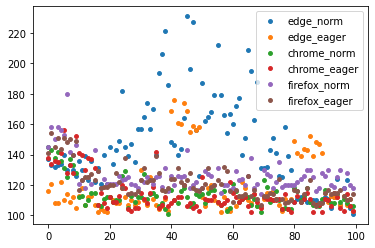

In [11]:
plt.scatter(range(len(edge_data_vision["wasm_normal"])), edge_data_vision["wasm_normal"], s=15, label="edge_norm")
plt.scatter(range(len(edge_data_vision["wasm_eager"])), edge_data_vision["wasm_eager"], s=15, label="edge_eager")
plt.scatter(range(len(chrome_data_vision["wasm_normal"])), chrome_data_vision["wasm_normal"], s=15, label="chrome_norm")
plt.scatter(range(len(chrome_data_vision["wasm_eager"])), chrome_data_vision["wasm_eager"], s=15, label="chrome_eager")
plt.scatter(range(len(firefox_data_vision["wasm_normal"])), firefox_data_vision["wasm_normal"], s=15, label="firefox_norm")
plt.scatter(range(len(firefox_data_vision["wasm_eager"])), firefox_data_vision["wasm_eager"], s=15, label="firefox_eager")
plt.legend()

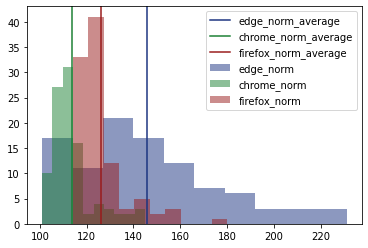

In [12]:
plt.hist(edge_data_vision["wasm_normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
# plt.hist(edge_data_vision["eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
plt.hist(chrome_data_vision["wasm_normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
# plt.hist(chrome_data_vision["eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
plt.hist(firefox_data_vision["wasm_normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
# plt.hist(firefox_data_vision["eager"], alpha=.5, bins=10, color=(0.5, 0.2, 0.1), label="firefox_eager")
plt.axvline(sum(edge_data_vision["wasm_normal"])/len(edge_data_vision["wasm_normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
# plt.axvline(sum(edge_data_vision["eager"])/len(edge_data_vision["eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
plt.axvline(sum(chrome_data_vision["wasm_normal"])/len(chrome_data_vision["wasm_normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
# plt.axvline(sum(chrome_data_vision["eager"])/len(chrome_data_vision["eager"]), c="orange", label="chrome_eager_average")
plt.axvline(sum(firefox_data_vision["wasm_normal"])/len(firefox_data_vision["wasm_normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
# plt.axvline(sum(firefox_data_vision["eager"])/len(firefox_data_vision["eager"]), c="g", label="firefox_eager_average")
plt.legend()

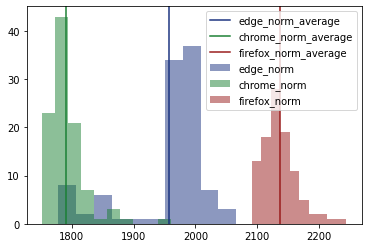

In [19]:
plt.hist(edge_data_vision["cpu_normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
# plt.hist(edge_data_vision["eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
plt.hist(chrome_data_vision["cpu_normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
# plt.hist(chrome_data_vision["eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
plt.hist(firefox_data_vision["cpu_normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
# plt.hist(firefox_data_vision["eager"], alpha=.5, bins=10, color=(0.5, 0.2, 0.1), label="firefox_eager")
plt.axvline(sum(edge_data_vision["cpu_normal"])/len(edge_data_vision["cpu_normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
# plt.axvline(sum(edge_data_vision["eager"])/len(edge_data_vision["eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
plt.axvline(sum(chrome_data_vision["cpu_normal"])/len(chrome_data_vision["cpu_normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
# plt.axvline(sum(chrome_data_vision["eager"])/len(chrome_data_vision["eager"]), c="orange", label="chrome_eager_average")
plt.axvline(sum(firefox_data_vision["cpu_normal"])/len(firefox_data_vision["cpu_normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
# plt.axvline(sum(firefox_data_vision["eager"])/len(firefox_data_vision["eager"]), c="g", label="firefox_eager_average")
plt.legend()

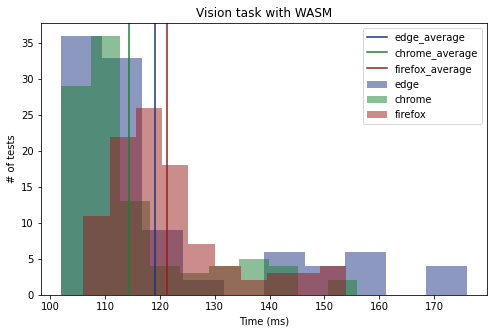

In [214]:
plt.figure(figsize=(8,5))
# plt.hist(edge_data_vision["normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
plt.hist(edge_data_vision["wasm_eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge")
# plt.hist(chrome_data_vision["normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
plt.hist(chrome_data_vision["wasm_eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome")
# plt.hist(firefox_data_vision["normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
plt.hist(firefox_data_vision["wasm_eager"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox")
# plt.axvline(sum(edge_data_vision["normal"])/len(edge_data_vision["normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
plt.axvline(sum(edge_data_vision["wasm_eager"])/len(edge_data_vision["wasm_eager"]), c=(0.1, 0.2, 0.5), label="edge_average")
# plt.axvline(sum(chrome_data_vision["normal"])/len(chrome_data_vision["normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
plt.axvline(sum(chrome_data_vision["wasm_eager"])/len(chrome_data_vision["wasm_eager"]), c=(0.1, 0.5, 0.2), label="chrome_average")
# plt.axvline(sum(firefox_data_vision["normal"])/len(firefox_data_vision["normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
plt.axvline(sum(firefox_data_vision["wasm_eager"])/len(firefox_data_vision["wasm_eager"]), c=(0.6, 0.1, 0.1), label="firefox_average")
plt.title("Vision task with WASM")
plt.xlabel("Time (ms)")
plt.ylabel("# of tests")
plt.legend()

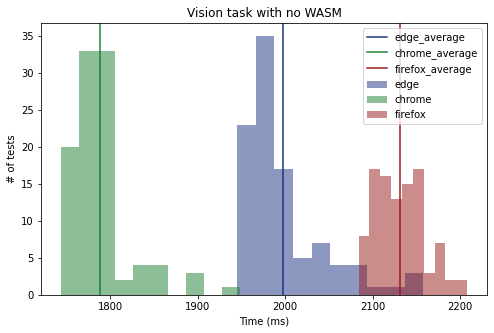

In [217]:
plt.figure(figsize=(8,5))
# plt.hist(edge_data_vision["normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
plt.hist(edge_data_vision["cpu_eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge")
# plt.hist(chrome_data_vision["normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
plt.hist(chrome_data_vision["cpu_eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome")
# plt.hist(firefox_data_vision["normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
plt.hist(firefox_data_vision["cpu_eager"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox")
# plt.axvline(sum(edge_data_vision["normal"])/len(edge_data_vision["normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
plt.axvline(sum(edge_data_vision["cpu_eager"])/len(edge_data_vision["cpu_eager"]), c=(0.1, 0.2, 0.5), label="edge_average")
# plt.axvline(sum(chrome_data_vision["normal"])/len(chrome_data_vision["normal"]), c=(0.1, 0.5, 0.2), label="chrome_average")
plt.axvline(sum(chrome_data_vision["cpu_eager"])/len(chrome_data_vision["cpu_eager"]), c=(0.1, 0.5, 0.2), label="chrome_average")
# plt.axvline(sum(firefox_data_vision["normal"])/len(firefox_data_vision["normal"]), c=(0.6, 0.1, 0.1), label="firefox_average")
plt.axvline(sum(firefox_data_vision["cpu_eager"])/len(firefox_data_vision["cpu_eager"]), c=(0.6, 0.1, 0.1), label="firefox_average")
plt.title("Vision task with no WASM")
plt.xlabel("Time (ms)")
plt.ylabel("# of tests")
plt.legend()

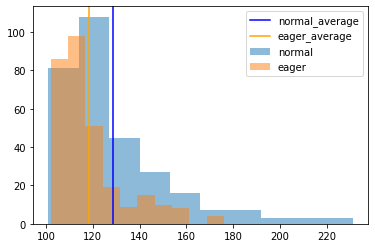

In [14]:
plt.hist(edge_data_vision["wasm_normal"]+chrome_data_vision["wasm_normal"]+firefox_data_vision["wasm_normal"], alpha=.5, bins=10, label="normal")
plt.hist(edge_data_vision["wasm_eager"]+chrome_data_vision["wasm_eager"]+firefox_data_vision["wasm_eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(edge_data_vision["wasm_normal"]+chrome_data_vision["wasm_normal"]+firefox_data_vision["wasm_normal"])/
            len(edge_data_vision["wasm_normal"]+chrome_data_vision["wasm_normal"]+firefox_data_vision["wasm_normal"]), c='b', label="normal_average")
plt.axvline(sum(edge_data_vision["wasm_eager"]+chrome_data_vision["wasm_eager"]+firefox_data_vision["wasm_eager"])/
            len(edge_data_vision["wasm_eager"]+chrome_data_vision["wasm_eager"]+firefox_data_vision["wasm_eager"]), c='orange', label="eager_average")
plt.legend()

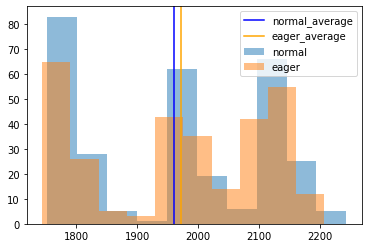

In [21]:
plt.hist(edge_data_vision["cpu_normal"]+chrome_data_vision["cpu_normal"]+firefox_data_vision["cpu_normal"], alpha=.5, bins=10, label="normal")
plt.hist(edge_data_vision["cpu_eager"]+chrome_data_vision["cpu_eager"]+firefox_data_vision["cpu_eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(edge_data_vision["cpu_normal"]+chrome_data_vision["cpu_normal"]+firefox_data_vision["cpu_normal"])/
            len(edge_data_vision["cpu_normal"]+chrome_data_vision["cpu_normal"]+firefox_data_vision["cpu_normal"]), c='b', label="normal_average")
plt.axvline(sum(edge_data_vision["cpu_eager"]+chrome_data_vision["cpu_eager"]+firefox_data_vision["cpu_eager"])/
            len(edge_data_vision["cpu_eager"]+chrome_data_vision["cpu_eager"]+firefox_data_vision["cpu_eager"]), c='orange', label="eager_average")
plt.legend()

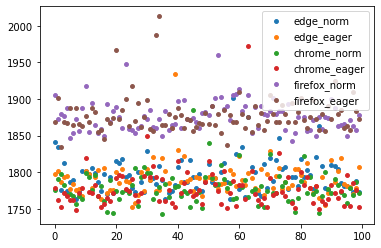

In [15]:
plt.scatter(range(len(edge_data_nlp["wasm_normal"])), edge_data_nlp["wasm_normal"], s=15, label="edge_norm")
plt.scatter(range(len(edge_data_nlp["wasm_eager"])), edge_data_nlp["wasm_eager"], s=15, label="edge_eager")
plt.scatter(range(len(chrome_data_nlp["wasm_normal"])), chrome_data_nlp["wasm_normal"], s=15, label="chrome_norm")
plt.scatter(range(len(chrome_data_nlp["wasm_eager"])), chrome_data_nlp["wasm_eager"], s=15, label="chrome_eager")
plt.scatter(range(len(firefox_data_nlp["wasm_normal"])), firefox_data_nlp["wasm_normal"], s=15, label="firefox_norm")
plt.scatter(range(len(firefox_data_nlp["wasm_eager"])), firefox_data_nlp["wasm_eager"], s=15, label="firefox_eager")
plt.legend()

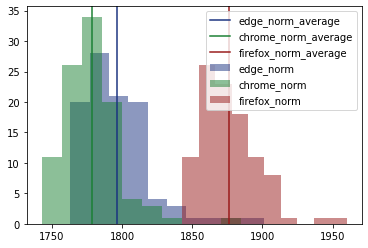

In [16]:
plt.hist(edge_data_nlp["wasm_normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
# plt.hist(edge_data_nlp["eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
plt.hist(chrome_data_nlp["wasm_normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
# plt.hist(chrome_data_nlp["eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
plt.hist(firefox_data_nlp["wasm_normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
# plt.hist(firefox_data_nlp["eager"], alpha=.5, bins=10, color=(0.5, 0.2, 0.1), label="firefox_eager")
plt.axvline(sum(edge_data_nlp["wasm_normal"])/len(edge_data_nlp["wasm_normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
# plt.axvline(sum(edge_data_nlp["eager"])/len(edge_data_nlp["eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
plt.axvline(sum(chrome_data_nlp["wasm_normal"])/len(chrome_data_nlp["wasm_normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
# plt.axvline(sum(chrome_data_nlp["eager"])/len(chrome_data_nlp["eager"]), c="orange", label="chrome_eager_average")
plt.axvline(sum(firefox_data_nlp["wasm_normal"])/len(firefox_data_nlp["wasm_normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
# plt.axvline(sum(firefox_data_nlp["eager"])/len(firefox_data_nlp["eager"]), c="g", label="firefox_eager_average")
plt.legend()

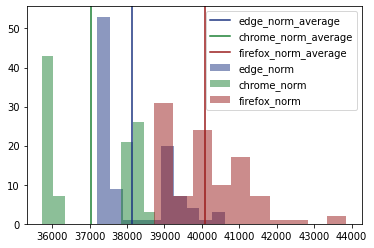

In [22]:
plt.hist(edge_data_nlp["cpu_normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
# plt.hist(edge_data_nlp["eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
plt.hist(chrome_data_nlp["cpu_normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
# plt.hist(chrome_data_nlp["eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
plt.hist(firefox_data_nlp["cpu_normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
# plt.hist(firefox_data_nlp["eager"], alpha=.5, bins=10, color=(0.5, 0.2, 0.1), label="firefox_eager")
plt.axvline(sum(edge_data_nlp["cpu_normal"])/len(edge_data_nlp["cpu_normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
# plt.axvline(sum(edge_data_nlp["eager"])/len(edge_data_nlp["eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
plt.axvline(sum(chrome_data_nlp["cpu_normal"])/len(chrome_data_nlp["cpu_normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
# plt.axvline(sum(chrome_data_nlp["eager"])/len(chrome_data_nlp["eager"]), c="orange", label="chrome_eager_average")
plt.axvline(sum(firefox_data_nlp["cpu_normal"])/len(firefox_data_nlp["cpu_normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
# plt.axvline(sum(firefox_data_nlp["eager"])/len(firefox_data_nlp["eager"]), c="g", label="firefox_eager_average")
plt.legend()

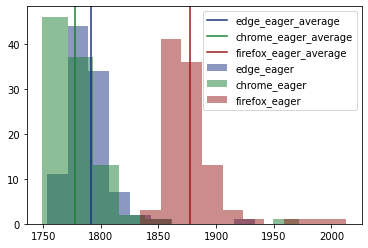

In [17]:
# plt.hist(edge_data_nlp["normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
plt.hist(edge_data_nlp["wasm_eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
# plt.hist(chrome_data_nlp["normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
plt.hist(chrome_data_nlp["wasm_eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
# plt.hist(firefox_data_nlp["normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
plt.hist(firefox_data_nlp["wasm_eager"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_eager")
# plt.axvline(sum(edge_data_nlp["normal"])/len(edge_data_nlp["normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
plt.axvline(sum(edge_data_nlp["wasm_eager"])/len(edge_data_nlp["wasm_eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
# plt.axvline(sum(chrome_data_nlp["normal"])/len(chrome_data_nlp["normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
plt.axvline(sum(chrome_data_nlp["wasm_eager"])/len(chrome_data_nlp["wasm_eager"]), c=(0.1, 0.5, 0.2), label="chrome_eager_average")
# plt.axvline(sum(firefox_data_nlp["normal"])/len(firefox_data_nlp["normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
plt.axvline(sum(firefox_data_nlp["wasm_eager"])/len(firefox_data_nlp["wasm_eager"]), c=(0.6, 0.1, 0.1), label="firefox_eager_average")
plt.legend()

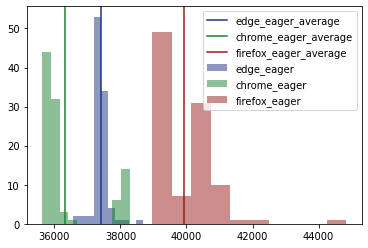

In [23]:
# plt.hist(edge_data_nlp["normal"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_norm")
plt.hist(edge_data_nlp["cpu_eager"], alpha=.5, bins=10, color=(0.1, 0.2, 0.5), label="edge_eager")
# plt.hist(chrome_data_nlp["normal"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_norm")
plt.hist(chrome_data_nlp["cpu_eager"], alpha=.5, bins=10, color=(0.1, 0.5, 0.2), label="chrome_eager")
# plt.hist(firefox_data_nlp["normal"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_norm")
plt.hist(firefox_data_nlp["cpu_eager"], alpha=.5, bins=10, color=(0.6, 0.1, 0.1), label="firefox_eager")
# plt.axvline(sum(edge_data_nlp["normal"])/len(edge_data_nlp["normal"]), c=(0.1, 0.2, 0.5), label="edge_norm_average")
plt.axvline(sum(edge_data_nlp["cpu_eager"])/len(edge_data_nlp["cpu_eager"]), c=(0.1, 0.2, 0.5), label="edge_eager_average")
# plt.axvline(sum(chrome_data_nlp["normal"])/len(chrome_data_nlp["normal"]), c=(0.1, 0.5, 0.2), label="chrome_norm_average")
plt.axvline(sum(chrome_data_nlp["cpu_eager"])/len(chrome_data_nlp["cpu_eager"]), c=(0.1, 0.5, 0.2), label="chrome_eager_average")
# plt.axvline(sum(firefox_data_nlp["normal"])/len(firefox_data_nlp["normal"]), c=(0.6, 0.1, 0.1), label="firefox_norm_average")
plt.axvline(sum(firefox_data_nlp["cpu_eager"])/len(firefox_data_nlp["cpu_eager"]), c=(0.6, 0.1, 0.1), label="firefox_eager_average")
plt.legend()

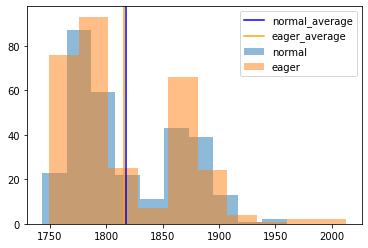

In [18]:
plt.hist(edge_data_nlp["wasm_normal"]+chrome_data_nlp["wasm_normal"]+firefox_data_nlp["wasm_normal"], alpha=.5, bins=10, label="normal")
plt.hist(edge_data_nlp["wasm_eager"]+chrome_data_nlp["wasm_eager"]+firefox_data_nlp["wasm_eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(edge_data_nlp["wasm_normal"]+chrome_data_nlp["wasm_normal"]+firefox_data_nlp["wasm_normal"])/
            len(edge_data_nlp["wasm_normal"]+chrome_data_nlp["wasm_normal"]+firefox_data_nlp["wasm_normal"]), c='b', label="normal_average")
plt.axvline(sum(edge_data_nlp["wasm_eager"]+chrome_data_nlp["wasm_eager"]+firefox_data_nlp["wasm_eager"])/
            len(edge_data_nlp["wasm_eager"]+chrome_data_nlp["wasm_eager"]+firefox_data_nlp["wasm_eager"]), c='orange', label="eager_average")
plt.legend()

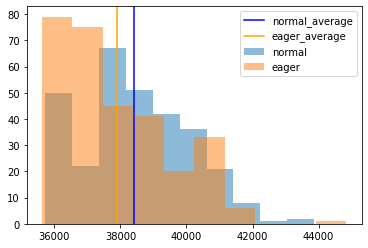

In [24]:
plt.hist(edge_data_nlp["cpu_normal"]+chrome_data_nlp["cpu_normal"]+firefox_data_nlp["cpu_normal"], alpha=.5, bins=10, label="normal")
plt.hist(edge_data_nlp["cpu_eager"]+chrome_data_nlp["cpu_eager"]+firefox_data_nlp["cpu_eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(edge_data_nlp["cpu_normal"]+chrome_data_nlp["cpu_normal"]+firefox_data_nlp["cpu_normal"])/
            len(edge_data_nlp["cpu_normal"]+chrome_data_nlp["cpu_normal"]+firefox_data_nlp["cpu_normal"]), c='b', label="normal_average")
plt.axvline(sum(edge_data_nlp["cpu_eager"]+chrome_data_nlp["cpu_eager"]+firefox_data_nlp["cpu_eager"])/
            len(edge_data_nlp["cpu_eager"]+chrome_data_nlp["cpu_eager"]+firefox_data_nlp["cpu_eager"]), c='orange', label="eager_average")
plt.legend()

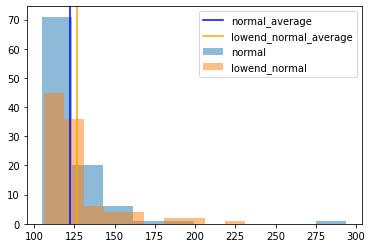

In [81]:
plt.hist(chrome_data["normal"], alpha=.5, bins=10, label="normal")
plt.hist(chrome_data["lowend_normal"], alpha=.5, bins=10, label="lowend_normal")
# plt.hist(chrome_data["eager"], alpha=.5, bins=10, label="eager")
# plt.hist(edge_data["eager"]+chrome_data["eager"]+firefox_data["eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(chrome_data["normal"])/len(chrome_data["normal"]), c='b', label="normal_average")
plt.axvline(sum(chrome_data["lowend_normal"])/len(chrome_data["lowend_normal"]), c='orange', label="lowend_normal_average")
plt.legend()

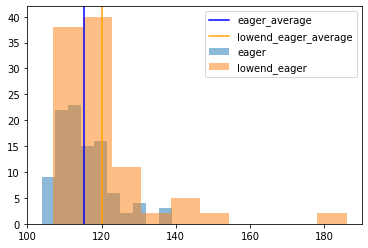

In [82]:
plt.hist(chrome_data["eager"], alpha=.5, bins=10, label="eager")
plt.hist(chrome_data["lowend_eager"], alpha=.5, bins=10, label="lowend_eager")
# plt.hist(chrome_data["eager"], alpha=.5, bins=10, label="eager")
# plt.hist(edge_data["eager"]+chrome_data["eager"]+firefox_data["eager"], alpha=.5, bins=10, label="eager")
plt.axvline(sum(chrome_data["eager"])/len(chrome_data["eager"]), c='b', label="eager_average")
plt.axvline(sum(chrome_data["lowend_eager"])/len(chrome_data["lowend_eager"]), c='orange', label="lowend_eager_average")
plt.legend()

In [48]:
from selenium.webdriver.common.keys import Keys
import selenium.webdriver.common.devtools.v109 as devtools
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [196]:
option = webdriver.ChromeOptions()
option.page_load_strategy = "normal"
for other_options in ["--enable-javascript", "--use-gl", "--enable-tracing", "--trace-startup",'--remote-debugging-port=9222']: #"headless"
    option.add_argument(other_options)
caps = DesiredCapabilities.CHROME
caps['goog:loggingPrefs'] = {'performance': 'ALL'}
driver = webdriver.Chrome(options = option, desired_capabilities=caps)
driver.set_page_load_timeout(3000000)
driver.set_script_timeout(3000000)

# data = driver.execute_script(f'return start("{backend}", 1, "vision")')

# driver.quit()

In [117]:
driver.get(url)

In [141]:
driver.quit()

In [161]:
# driver.execute_cdp_cmd("CSS.enable",{})
driver.get(url)
driver.execute_cdp_cmd("Tracing.start",{})
data = driver.execute_script(f'return start("wasm", 1, "vision")')
# print(driver.execute_cdp_cmd("Tracing.recordClockSyncMarker", {}))
# print(driver.execute_cdp_cmd("Tracing.dataCollected", {}))
p = driver.execute_cdp_cmd("Tracing.end",{'path': 'C://trace.log'})
# print(driver.execute_cdp_cmd("Tracing.getDataCollected",{}))
# performance_data = driver.execute_script("return window.performance.getMetrics();")
print (p)

{}


In [204]:
import time
import pychrome

# Set up the Chrome instance with remote debugging enabled
chrome = pychrome.Browser(url="http://localhost:9222")

# Navigate to the page you want to test
tab = chrome.new_tab()
tab.Page.navigate(url="http://localhost:8000")
tab.wait(5)

# Enable the necessary performance domains
tab.Page.enable()
tab.Network.enable()
tab.Performance.enable()

# Wait for the page to load and then collect the metrics
time.sleep(5)
metrics = tab.Performance.getMetrics()

# Print out the metrics of interest
print(f"DomContentLoaded: {metrics['metrics']['DomContentLoaded']}")
print(f"FirstLayout: {metrics['metrics']['FirstLayout']}")
print(f"FirstPaint: {metrics['metrics']['FirstPaint']}")
print(f"FirstMeaningfulPaint: {metrics['metrics']['FirstMeaningfulPaint']}")
print(f"FirstContentfulPaint: {metrics['metrics']['FirstContentfulPaint']}")

# Close the tab and the Chrome instance
chrome.close_tab(tab)
chrome.close()


ConnectionError: HTTPConnectionPool(host='localhost', port=9225): Max retries exceeded with url: /json/new (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001868FA5FB50>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [199]:
# choose the tab you want to test
target_tab = tabs[0]['webSocketDebuggerUrl'][2:]

# set the performance metrics endpoint for the chosen tab
perf_url = "http"+target_tab + '/performance'

# send a request to get the performance metrics
response = requests.get(perf_url)
metrics = json.loads(response.content)

# extract the relevant information from the metrics object

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [193]:
metrics

[{'description': '',
  'devtoolsFrontendUrl': '/devtools/inspector.html?ws=localhost:9222/devtools/page/F0A004B477B5FC63C8127AC832071B5F',
  'id': 'F0A004B477B5FC63C8127AC832071B5F',
  'title': 'localhost:9222/json',
  'type': 'page',
  'url': 'http://localhost:9222/json',
  'webSocketDebuggerUrl': 'ws://localhost:9222/devtools/page/F0A004B477B5FC63C8127AC832071B5F'},
 {'description': '',
  'devtoolsFrontendUrl': '/devtools/inspector.html?ws=localhost:9222/devtools/page/E6D91DEA6BE60843DB8478295390C130',
  'id': 'E6D91DEA6BE60843DB8478295390C130',
  'title': 'data:,',
  'type': 'page',
  'url': 'data:,',
  'webSocketDebuggerUrl': 'ws://localhost:9222/devtools/page/E6D91DEA6BE60843DB8478295390C130'}]

In [187]:
perf_logs

[{'level': 'INFO',
  'message': '{"message":{"method":"Network.loadingFinished","params":{"encodedDataLength":0,"requestId":"8AAC630E7B08B70650471A1ACEFFD16F","shouldReportCorbBlocking":false,"timestamp":1974532.501607}},"webview":"8A7A2C6F6A7FA7AC6615B4AF7F486248"}',
  'timestamp': 1677660276310},
 {'level': 'INFO',
  'message': '{"message":{"method":"Page.loadEventFired","params":{"timestamp":1974532.634996}},"webview":"8A7A2C6F6A7FA7AC6615B4AF7F486248"}',
  'timestamp': 1677660276310},
 {'level': 'INFO',
  'message': '{"message":{"method":"Page.frameStoppedLoading","params":{"frameId":"8A7A2C6F6A7FA7AC6615B4AF7F486248"}},"webview":"8A7A2C6F6A7FA7AC6615B4AF7F486248"}',
  'timestamp': 1677660276310},
 {'level': 'INFO',
  'message': '{"message":{"method":"Page.domContentEventFired","params":{"timestamp":1974532.635242}},"webview":"8A7A2C6F6A7FA7AC6615B4AF7F486248"}',
  'timestamp': 1677660276310},
 {'level': 'INFO',
  'message': '{"message":{"method":"Network.requestWillBeSent","params

In [186]:
perf_metrics

[{'encodedDataLength': 0,
  'requestId': '8AAC630E7B08B70650471A1ACEFFD16F',
  'shouldReportCorbBlocking': False,
  'timestamp': 1974532.501607},
 {'timestamp': 1974532.634996},
 {'frameId': '8A7A2C6F6A7FA7AC6615B4AF7F486248'},
 {'timestamp': 1974532.635242},
 {'documentURL': 'http://localhost:8000/',
  'frameId': '8A7A2C6F6A7FA7AC6615B4AF7F486248',
  'hasUserGesture': False,
  'initiator': {'type': 'other'},
  'loaderId': '962AF82A2A947E22B9A9BD63A880D376',
  'redirectHasExtraInfo': False,
  'request': {'headers': {'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"'},
   'initialPriority': 'VeryHigh',
   'isSameSite': True,
   'method': 'GET',
   'mixedContentType': 'none',
   'referrerPolicy': 'strict-origin-when-cross-

In [146]:
driver.execute_cdp_cmd("Performance.getMetrics",{})

{'metrics': []}

In [45]:
driver.execute_cdp_cmd('Performance.enable', {})

{}

In [ ]:
# devtool = driver.get

In [65]:
for entry in driver.get_log('performance'):
    print(entry)

In [ ]:
for entry in driver.get_log('performance'):
    print(entry)

In [53]:
# t = driver.execute_cdp_cmd('Performance.getMetrics', {})
# print(t)

In [54]:
# async with driver.bidi_connection() as session:
#     cdpSession = session.session
#     await cdpSession.execute(devtools.emulation.set_geolocation_override(latitude=41.8781,longitude=-87.6298,accuracy=100))

In [55]:
# devTools = devtools.

In [56]:
# devTools

In [57]:
# driver.get(url)

In [58]:
# timing = driver.execute_script("return window.performance.timing")
# timing

In [75]:
driver.quit()